In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
# b. Load the dataset
data = pd.read_csv('creditcard.csv')  # Adjust path as necessary
X = data.drop('Class', axis=1)
y = data['Class']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42, stratify=y)


In [7]:
# c. Define the Autoencoder model
input_dim = X_train.shape[1]
autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(14, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])

In [9]:
# d. Compile and train the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test), verbose=1)

Epoch 1/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0304 - val_loss: 0.8269
Epoch 2/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8054 - val_loss: 0.7874
Epoch 3/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7761 - val_loss: 0.7699
Epoch 4/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7731 - val_loss: 0.7558
Epoch 5/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7439 - val_loss: 0.7477
Epoch 6/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.7361 - val_loss: 0.7429
Epoch 7/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7271 - val_loss: 0.7403
Epoch 8/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7368 - val_loss: 0.7379
Epoch 9/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7240 - val_loss: 0.7358
Epoch 10/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7144 - val_loss: 0.7340
Epoch 11/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7259 - val_loss: 0.7328
Epoch 12/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Test set anomalies detected: 2849


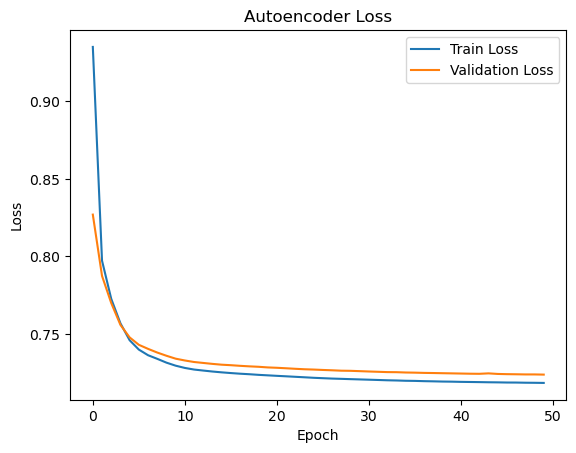

In [11]:
# e. Evaluate the model
X_test_pred = autoencoder.predict(X_test)
test_loss = np.mean(np.power(X_test - X_test_pred, 2), axis=1)
threshold = np.percentile(test_loss, 95)  # 95th percentile for anomaly detection
y_test_pred = [1 if e > threshold else 0 for e in test_loss]

# Print results
print("Test set anomalies detected:", sum(y_test_pred))

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()